In [65]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy import text
from config import credential
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

engine = create_engine(f'postgresql://{credential}@localhost:5432/Employees')
cxcn = engine.connect()
result = cxcn.execute(text("select salary, emp_no as employees from salaries;"))     
    
salaries = pd.DataFrame(result, columns=['salary','employees'])

# salaries['salary_$'] = salaries['salary'].apply(format("${:.2f}"))

salaries.describe()


,salary,employees
count,300024.000000,300024.000000
mean,52970.732451,253321.763392
std,14301.478491,161828.235540
min,40000.000000,10001.000000
25%,40000.000000,85006.750000
50%,48681.000000,249987.500000
75%,61758.000000,424993.250000
max,129492.000000,499999.000000


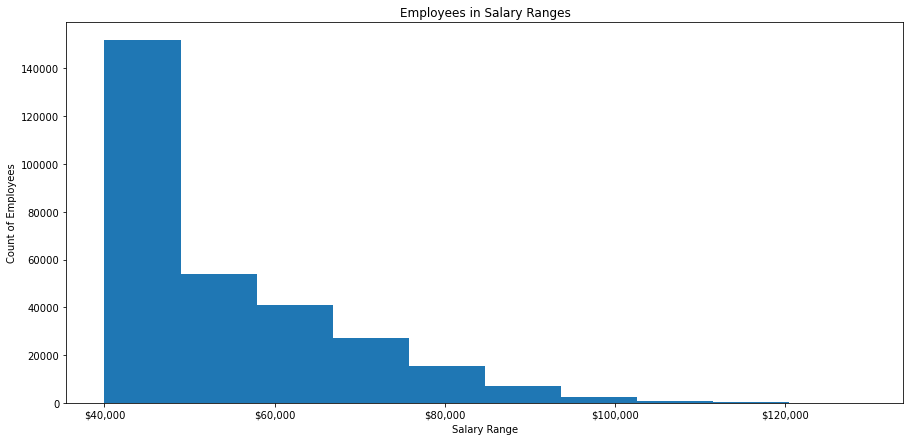

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
plt.hist(salaries['salary'])
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
plt.title("Employees in Salary Ranges")
plt.xlabel("Salary Range")
plt.ylabel("Count of Employees")
plt.show()

In [27]:
result2 = cxcn.execute(text("select * from ufc_avgsalarybytitle()"))

salarybytitle = pd.DataFrame(result2, columns=['Job Title','Avg Salary'])
data = salarybytitle.astype({'Avg Salary': 'float'})

data

,Job Title,Avg Salary
0,Engineer,48535.336511
1,Technique Leader,48582.896092
2,Manager,51531.041667
3,Assistant Engineer,48564.434447
4,Staff,58465.382850
5,Senior Engineer,48506.799871
6,Senior Staff,58550.172704


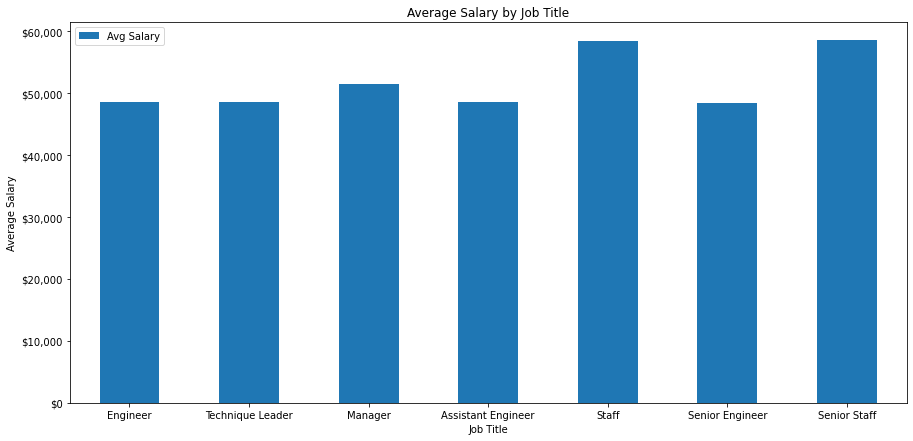

In [28]:
#create bar chart 

fig, ax = plt.subplots(1, 1, figsize=(15,7))
data.plot(kind='bar', x='Job Title',y='Avg Salary', ax=ax)

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xticks(rotation=0)
plt.title("Average Salary by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.show()